In [1]:
# Import required libraries and modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Set global font size and styles for matplotlib plots
import matplotlib.pyplot as plt
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Introduction

As we all know, forests play a crucial role in the health of our planet by providing habitat for wildlife, regulating the climate, and producing oxygen. However, with climate change and deforestation, it's becoming increasingly important to understand and manage our forests. Accurate identification and prediction of forest cover types are essential for monitoring forest health, biodiversity assessment, and planning conservation strategies. We aims to provide accurate predictions of the seven different forest cover types using machine learning algorithms.

To achieve our prediction goal, we trained and tested four different machine learning models on the dataset: Random Forest, K-Nearest Neighbors (KNN), Multi-Layer Perceptron (MLP), and Decision Tree. These models were chosen based on their ability to handle complex, non-linear relationships between features, as well as their ability to perform well on classification tasks.

Our expected outcomes for this project include the evaluation of the performance of each model on the dataset, as well as the identification of the most important features for predicting forest cover types. Additionally, we hope to gain insights into the ecological factors that influence the distribution of different forest cover types in the study area.

# 1. Understand, Clean, and Format Dataset

The features in dataset provide information about the topography, soil type, and other environmental factors in each observation.

* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points

Two categorical features which shows by binary value of 0 or 1: *wilderness area* and *soil type*. 

* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area located in the Roosevelt National Forest of northern Colorado
1. Rawah
2. Neota
3. Comanche Peak
4. Cache la Poudre

* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

These categorical features can provide information about the habitat and environmental conditions in each observation.

Finally, seven forest types which is our target are:

* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation
1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

Let's load the dataset!

In [2]:
# This code snippet imports the Pandas library, reads a CSV file from a URL, and creates a deep copy of the DataFrame

import pandas as pd

train_url = 'https://raw.githubusercontent.com/Nayaeun/23Spring_ML_Final/main/train.csv'
df_raw_train = pd.read_csv(train_url)
df_train = df_raw_train.copy(deep=True)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [4]:
# Checking the first 5 rows
df_train.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [5]:
df_train.nunique()

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7                                1
Soil_Type8                      

In [6]:
print (df_train['Soil_Type7'].unique())
print (df_train['Soil_Type15'].unique())

[0]
[0]


In a binary context, a 0 typically represents the absence or "no" condition, so all 0s for soil type 7 and 15 suggest the absence of that soil type for that specific forest type.

In [7]:
# Check null values
df_train.isnull().sum().sum() # sum of null values in the dataset

0

We checked for missing values in the dataset, and found that there were no null values in any of the features. This allowed us to proceed without having to impute missing values.

In [8]:
# Display dataset's summary statistics
print(df_train.describe())

                Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000         

### 1.1 Check for Outliers

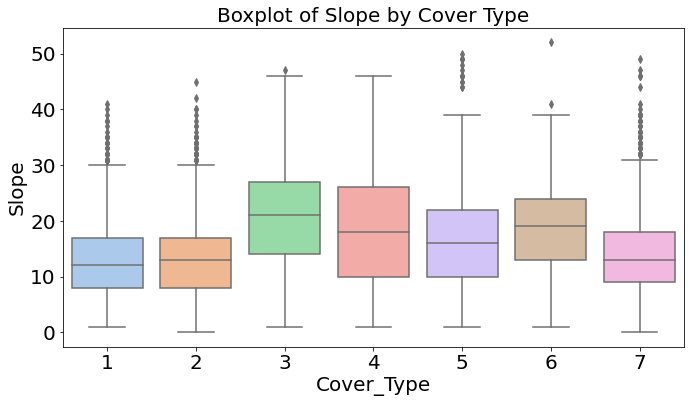

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='Cover_Type', y='Slope', palette='pastel')
plt.title('Boxplot of Slope by Cover Type')
plt.tight_layout()
plt.show()

def remove_outliers(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for the 'Slope' feature
cleaned_df = remove_outliers(df_train, 'Slope')

To ensure that our models were not affected by any outliers, we removed them using the Z-score method. Any observations with a Z-score greater than 3 were removed from the dataset.

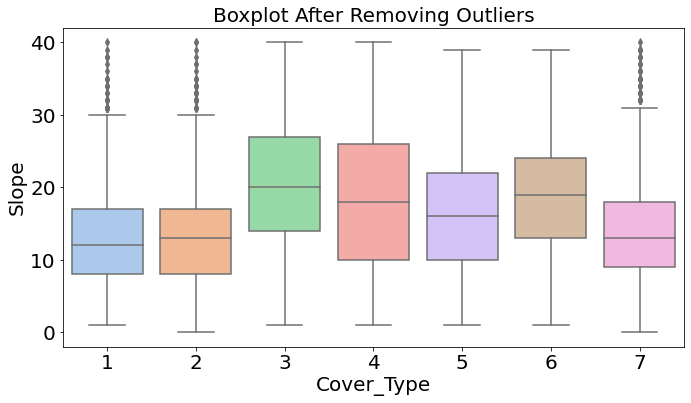

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_df, x='Cover_Type', y='Slope', palette='pastel')
plt.title('Boxplot After Removing Outliers')
plt.tight_layout()
plt.show()

Outliers completely removed well.

In this graph, cover 3 and 4 tends to have higher slope than other cover type. 
Forest cover 1,2 and 7 have least slope median although there is significant amount of outlier in them. 

In [11]:
df_train.shape, cleaned_df.shape

((15120, 56), (15063, 56))

# 2. Exploratory Data Analysis

### 2.1 Distribution of Cover Types

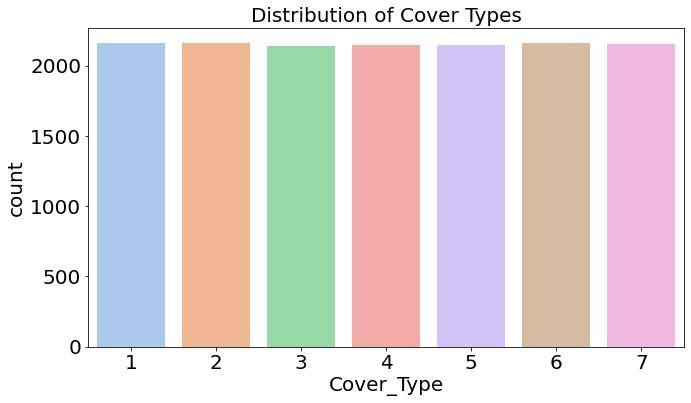

In [12]:
# Visualize the distribution of cover types
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_df, x='Cover_Type', palette='pastel')
plt.title('Distribution of Cover Types')
plt.tight_layout()
plt.show()

# All cover types have same the number of counts. 

One of the strengths of our dataset is that we have an equal number of data points for all forest cover types, which is important because it eliminates any potential imbalances that could affect the accuracy of our machine learning models. This balance in the dataset allows us to confidently train our models to accurately predict the forest cover type without worrying about any inherent biases or limitations in the data.

### 2.2 Wilderness Area - Cover Type

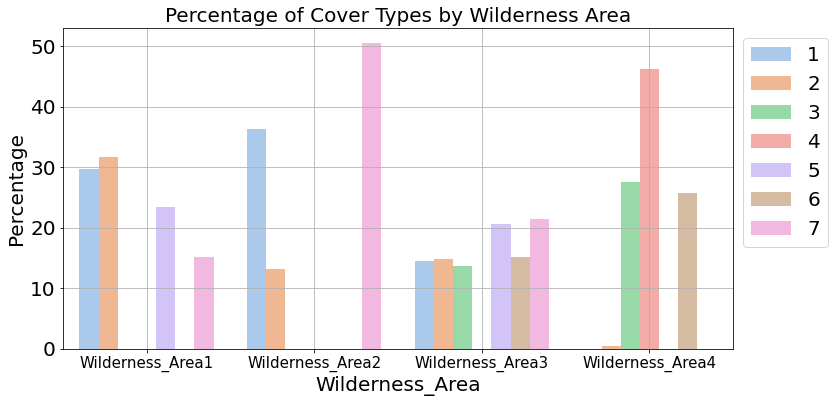

In [13]:
wilderness_cols = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']

wilderness_data = cleaned_df.melt(id_vars='Cover_Type', value_vars=wilderness_cols, var_name='Wilderness_Area', value_name='Present')

# Filter the data to include only the rows where the wilderness area is present
wilderness_data = wilderness_data[wilderness_data['Present'] == 1]

# Calculate the total count of each wilderness area
wilderness_counts = wilderness_data['Wilderness_Area'].value_counts()

# Calculate the percentage with respect to the total count of each wilderness area
wilderness_data['Percentage'] = wilderness_data.apply(lambda row: 100 * (1 / wilderness_counts[row['Wilderness_Area']]), axis=1)

plt.figure(figsize=(12, 6))
sns.barplot(data=wilderness_data, x='Wilderness_Area', y='Percentage', hue='Cover_Type', estimator=sum, palette='pastel', ci=None)
plt.ylabel('Percentage')
plt.grid()
plt.title('Percentage of Cover Types by Wilderness Area')
plt.xticks(fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

I observed distinct patterns in the distribution of cover types across different wilderness areas:

* Spruce/Fir, Lodgepole Pine and Krummholz (Type 1, 2, 7) mostly found in Rawah, Neota and Comanche Peak (Area 1,2 and 3).
* Ponderosa Pine (Type 3) is more likely to be found in Cache la Poudre (Area 4) compared to other areas.
* Comanche Peak (Area 3) hosts all cover types except for Cottonwood/Willow (Type 4), which is exclusive to Cache la Poudre (Area 4).
* Aspen (Type 5) shows a relatively equal likelihood of occurrence in Rawah (Area 1) and Comanche Peak (Area 3).
* Neota (Area 2) is characterized by the presence of Spruce/Fir (Type 1), Lodgepole Pine (Type 2), and Krummholz (Type 7), while Cache la Poudre (Area 4) exhibits a different cover type composition, including Ponderosa Pine (Type 3), Cottonwood/Willow (Type 4), and Douglas-fir (Type 6).

### 2.3 Wilderness Area - Soil Type - Cover Type

In [14]:
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)
    
category_df = cleaned_df.copy(deep=True)   
reverse_one_hot_encode(category_df, 16, 56, "Soil_Type")

In [15]:
# Create one column as Wilderness_Area_Type and represent it as categorical data
category_df['Wilderness_Area_Type'] = (cleaned_df.iloc[:, 11:15] == 1).idxmax(1)

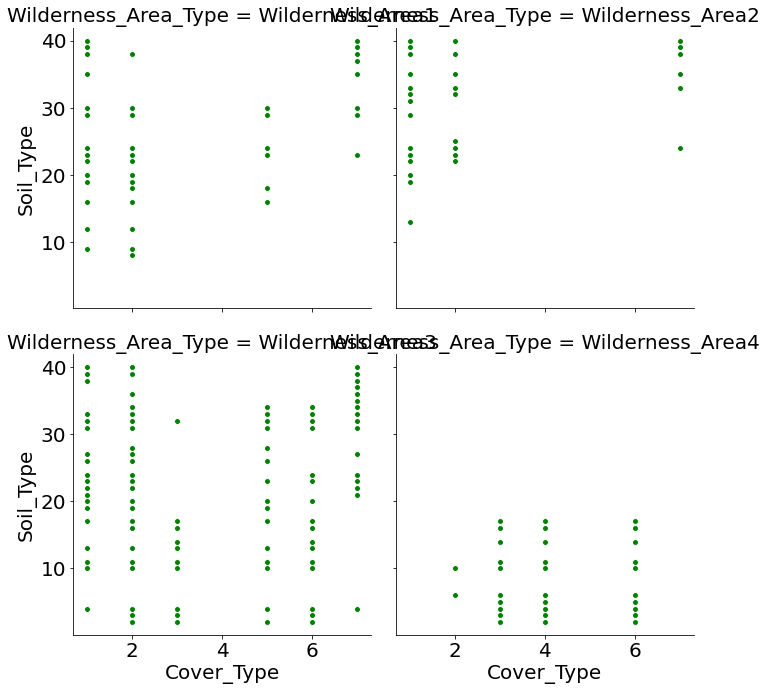

In [16]:
#list of wilderness areas
wilderness_areas = sorted(category_df['Wilderness_Area_Type'].value_counts().index.tolist())


# plot relationship of soil type and cover type among different wilderness areas
g = sns.FacetGrid(category_df, col="Wilderness_Area_Type", 
                  col_wrap=2, height=5, col_order=wilderness_areas)
g = g.map(plt.scatter,"Cover_Type", "Soil_Type", edgecolor="w", color="g")



* Comanche Peak (Area 3) is more diverse in soil type and cover type.
* Only soil types 1 through 20 is represented in Cache la Poudre (Area 4).
* Krummholz (Cover Type 7) seems to grow with soil types 25 through 40.
* Aspen and Douglas-fir (Cover Type 5, 6) can grow with most of the soil types in Comanche Peak (Area 3).
* Ponderosa Pine (Cover Type 3) loves soil type 0 through 15 in Commanche Peak and Cache la Poudre (Area 3, 4).
* Spruce/Fir and Lodgepole Pine (Cover Type 1, 2) can grow with any soil type except Cache la Poudre (Area 4).

### 2.4 Continuous Features Relationship

In [19]:
# Visualize relationships between selected features using a pairplot
subset_features = cleaned_df.columns[1:11].tolist()

covertype = df_train.columns[-1]
subset_features.append(covertype)

continuous_subset = cleaned_df[subset_features]
continuous_subset.head(5)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Cover_Type  
0                                6279           5  
1                                6225           5  
2                                6121           2  
3                                6211           2  
4                                6172           5

No handles with labels found to put in legend.


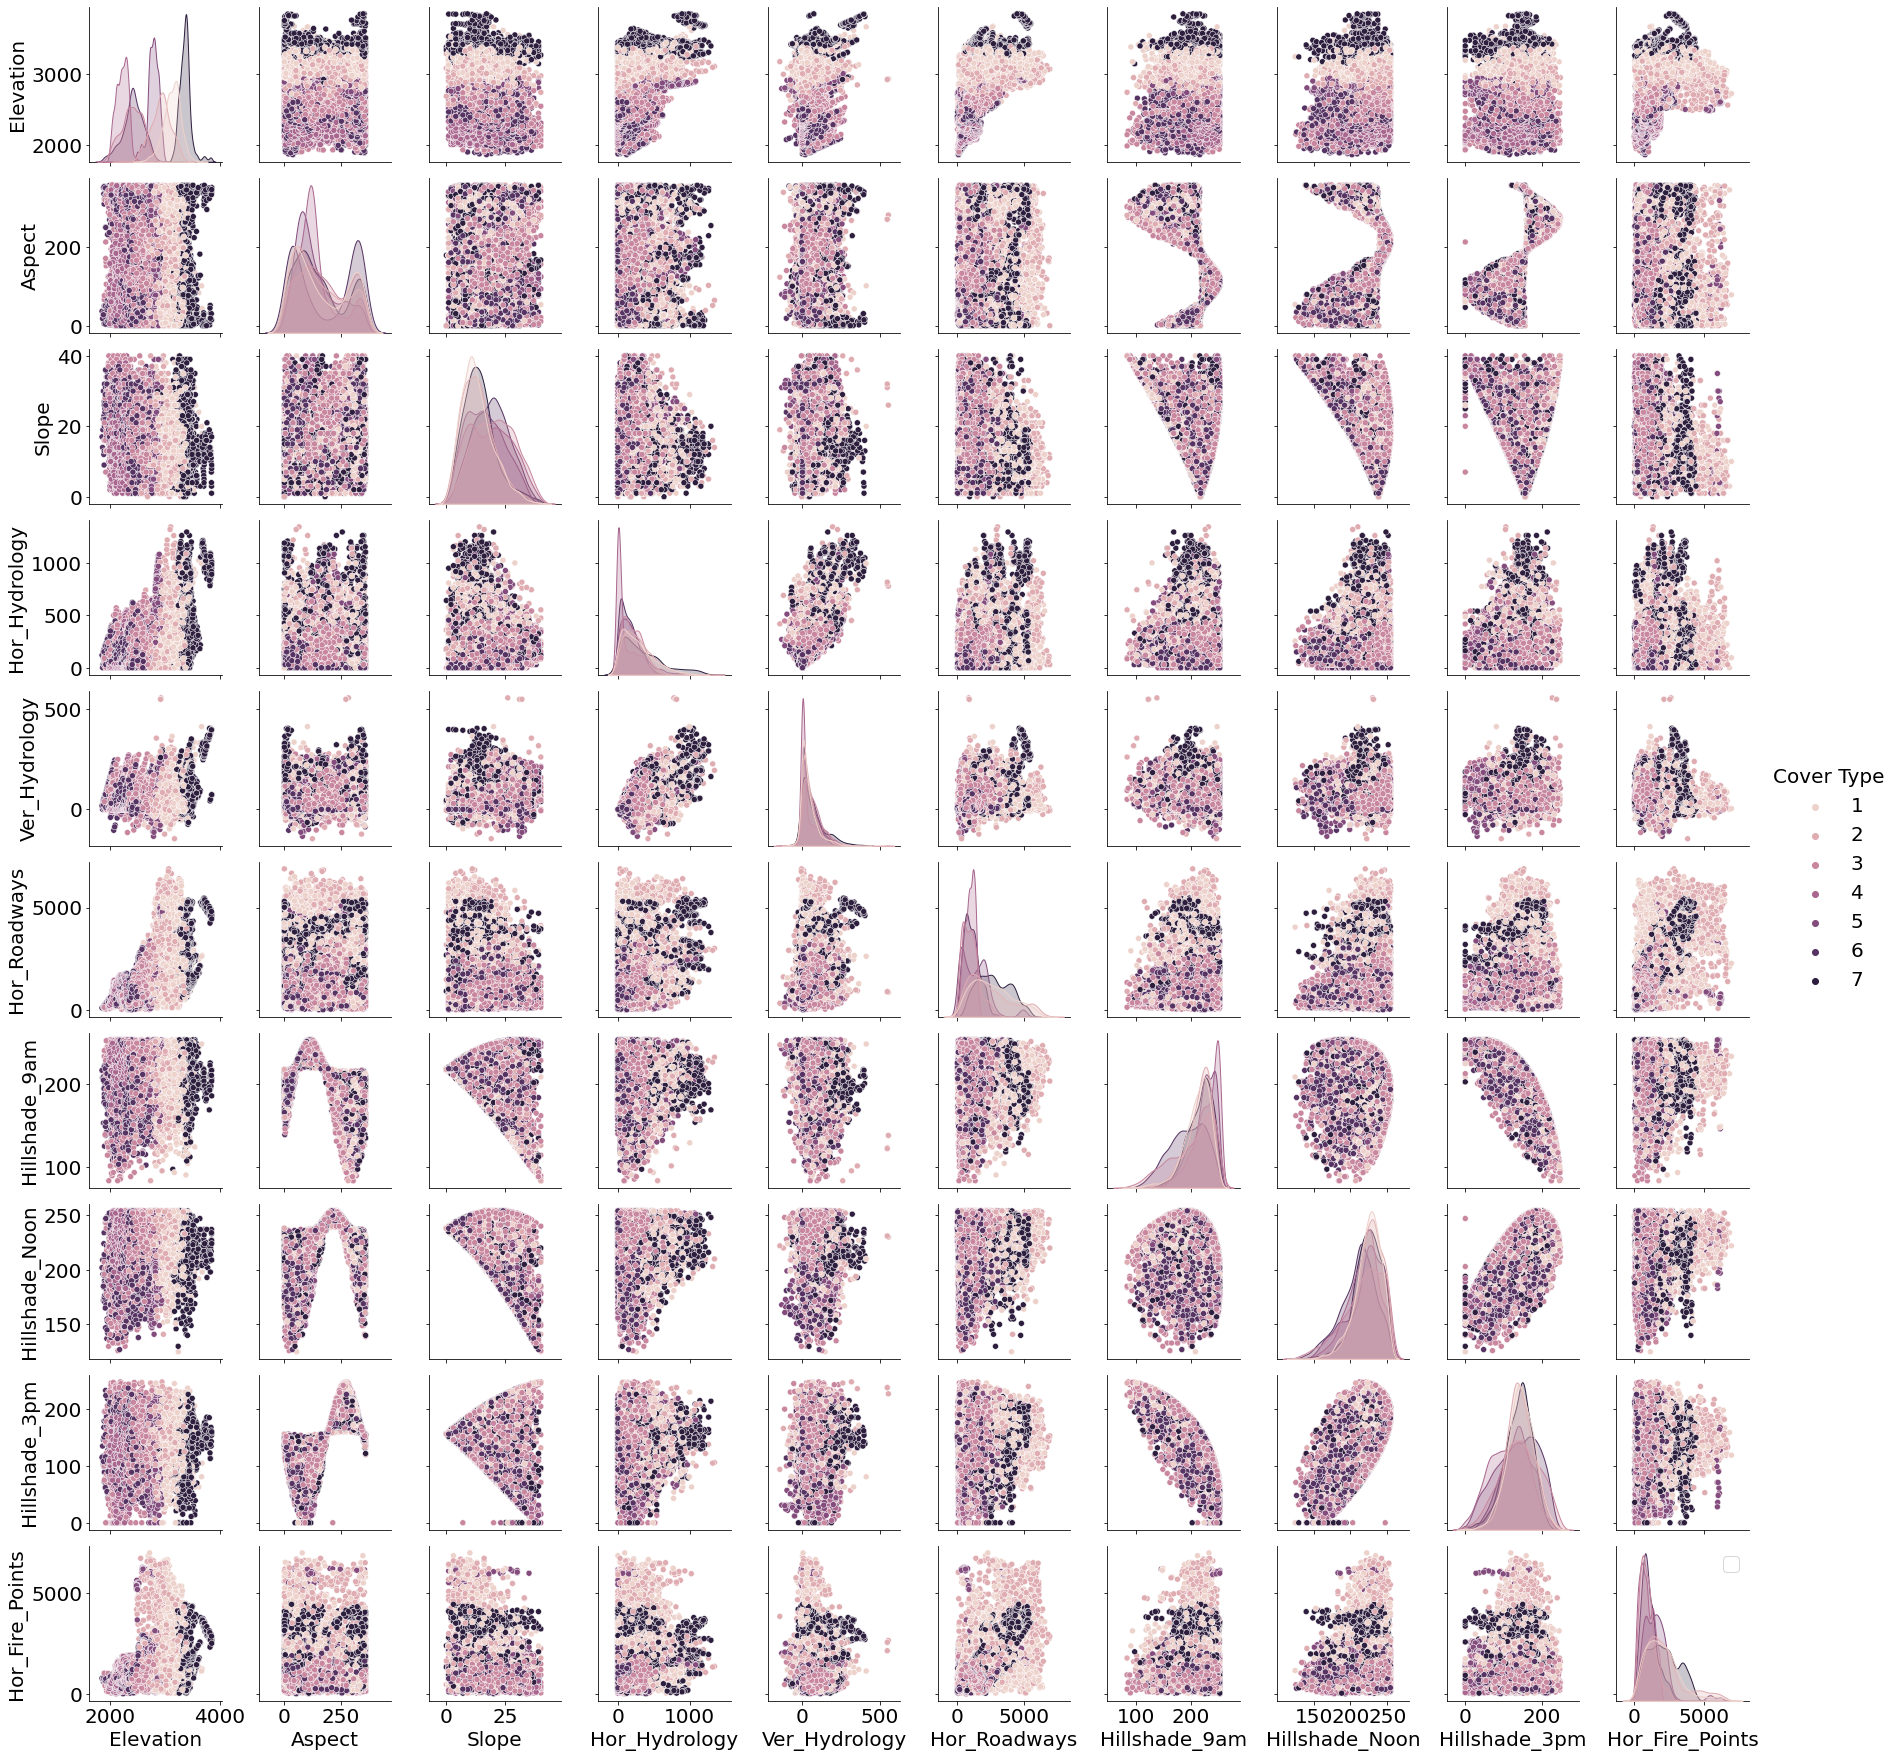

In [20]:
continuous_subset.columns = ['Elevation', 'Aspect', 'Slope', 'Hor_Hydrology', 'Ver_Hydrology', 'Hor_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Hor_Fire_Points', 'Cover Type']
    
pairplot = sns.pairplot(continuous_subset, hue='Cover Type')

plt.legend()
plt.show()

A pairplot to visualize the relationships between different continuous variables such as elevation, aspect, slope, and various distance measures.

**Distribution**
* Hillshade_9am and Hillshade_Noon has left-skewed distributions.
* Elevation (height of a fantastic trees) resembles a uniform distribution.
* Higher elevations were more likely to have forest cover type 7. This was evident in plots comparing elevation to other features, where the highest elevation values consistently corresponded to type 7 forest cover.
* The distribution of horizontal distance measures (to hydrology, roadways, and fire points) are all right-skewed, indicating that most of the forest cover types are located relatively close to these features. This suggests that proximity to water and accessibility via roadways may be important factors in determining forest cover type.

Some Collinear features:

* hillshade noon - hillshade 3 pm
* hillsahde 3 pm - hillshade 9 am
* vertical distance to hydrology - horizontal distance to hydrology
* elevation - slope

### 2.5 Pearson Coefficients of all features

Text(0.5, 1.05, 'Pearson Correlation of All Features')

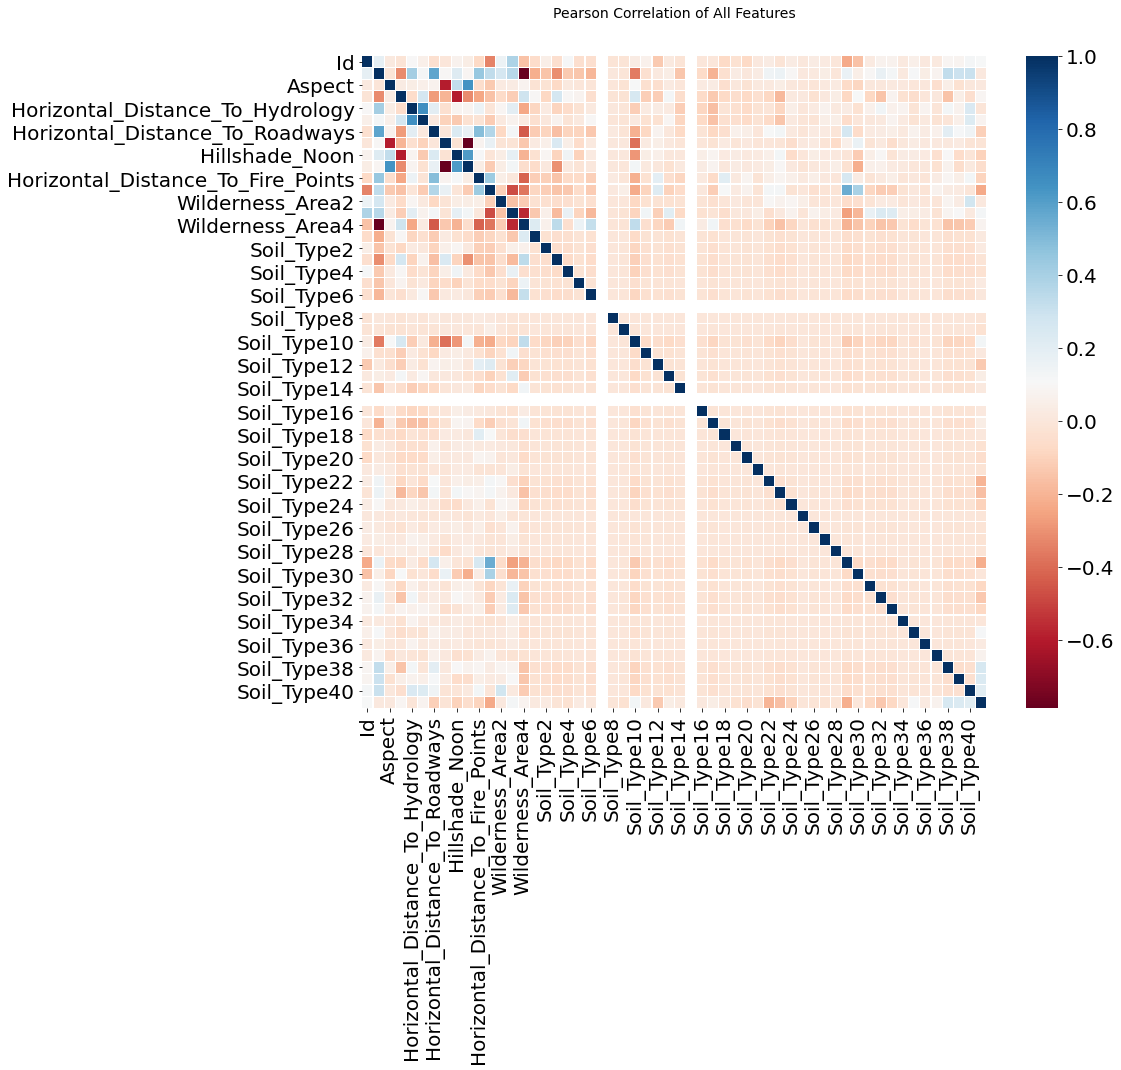

In [21]:
plt.figure(figsize=(14,12))

# plot heatmap set the title
colormap = plt.cm.RdBu
sns.heatmap(cleaned_df.corr(),linewidths=0.1,vmax=1.0, 
            square=False, cmap=colormap, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.05, size=14)


None of the features are significantly different effect on determining the label cover type.

One interesting finding though, Soil Type 7 and 15 columns are blank in the heatmap, thus zero effect on determining the label Cover_Type.

Approximately 5 (1 percent of all soil types) soil_type columns affects the cover type.

In [22]:
category_df_copy = category_df.copy(deep=True)
# Assuming df is your DataFrame
columns_to_remove = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                     'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                     'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
                     'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                     'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                     'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                     'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
                     'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
                     'Wilderness_Area_Type']

soil_numeric_df = category_df_copy.drop(columns=columns_to_remove)

soil_numeric_df


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                221             232            148   
1                220             235            151   
2                234             238            135   
3                238             238            122   
4                220             234            150   
...              ...             ...            ...   
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                    6279                 1                 0   
1                                    6225                 1                 0   
2                                    6121                 1                 0   
3                                    6211                 1                 0   
4                                    6172                 1                 0   
...                                   ...               ...               ...   
15115                                1282                 0                 0   
15116                                1325                 0                 0   
15117                                1187                 0                 0   
15118                                 932                 0                 0   
15119                                 914                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Cover_Type  Soil_Type  
0                     0                 0           5         29  
1                     0                 0           5         29  
2                     0                 0           2         12  
3                     0                 0           2         30  
4                     0                 0           5         29  
...                 ...               ...         ...        ...  
15115                 1                 0           3          4  
15116                 1               

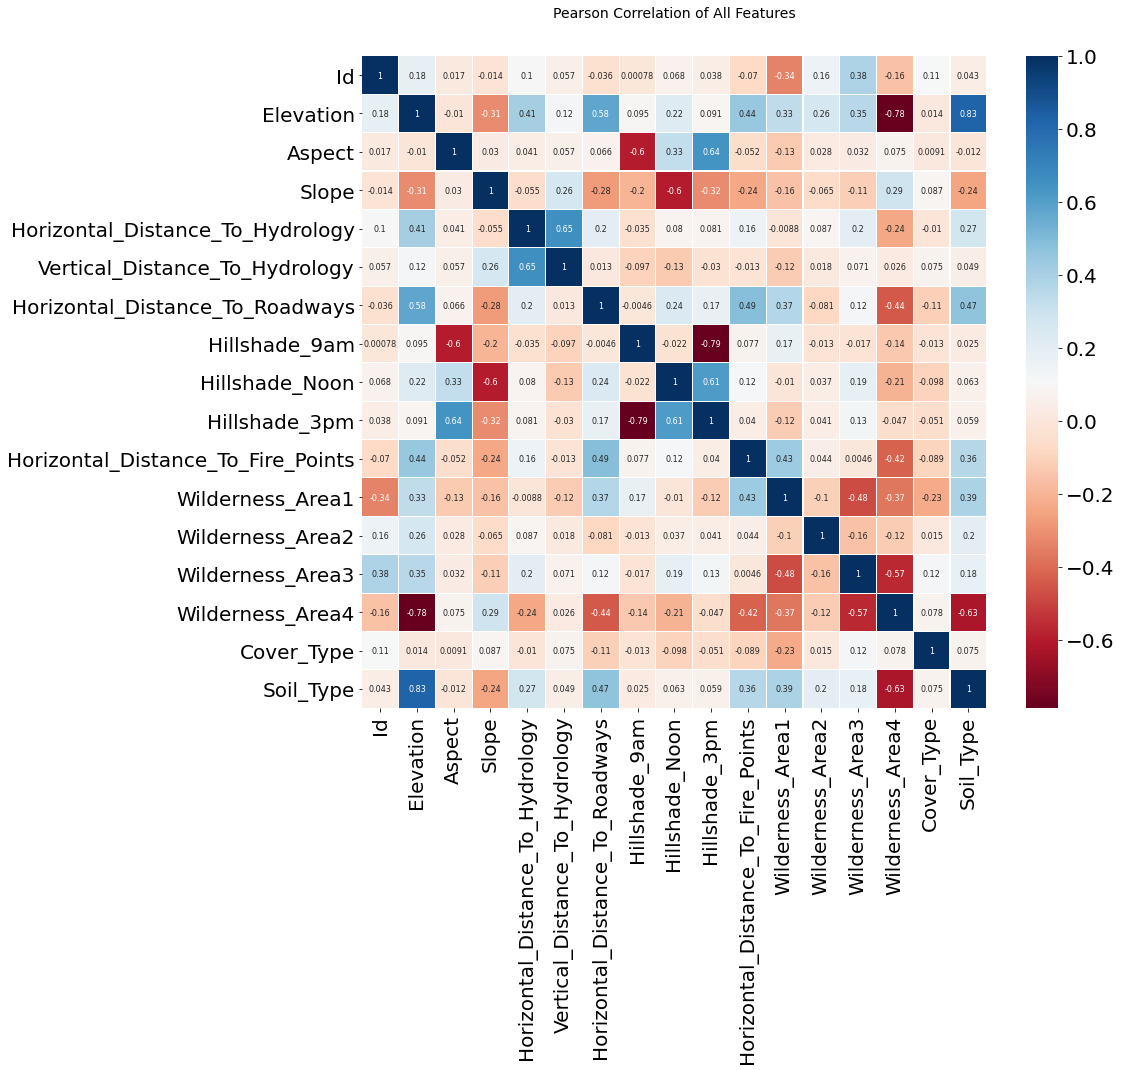

In [23]:
plt.figure(figsize=(14,12))

# plot heatmap set the title
colormap = plt.cm.RdBu
sns.heatmap(soil_numeric_df.corr(),linewidths=0.1,vmax=1.0,
            square=False, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 8})
plt.title('Pearson Correlation of All Features', y=1.05, size=14)
plt.show()

### 2.6 Finding From Exploratory Data Analysis
* Different wilderness areas consist of some specific trees. Interestingly, there is one fantastic tree, Cottonwood/Willow, specifically likes to grow in wilderness area 4. 
* Soil types are reverse-one-hot-encoded, meaning they are going to be included as numeric data in the training set and one-hot-encoded soil type columns will be excluded. With that way, there is a stronger correlation between soil type and Cover_Type.
* Hillshade columns are collinear within each other and Hillshade_9am has the least importance in determining Cover_Type. Thus this column will be dropped for better interpretability of the future model.

# 3. Feature Engineering & Selection

Reference: https://www.slideshare.net/danielgribel/forest-cover-type-prediction-56288946?next_slideshow=2

After doing some Google Search about the features, maybe adding some features might help achieving stronger correlations. I decided to add linear combinations of the horizontal distance columns and Euclidian distance of Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology as suggested in the **reference**.

In [24]:
soil_numeric_df['Euclidian_Distance_To_Hydrology'] = (soil_numeric_df['Horizontal_Distance_To_Hydrology']**2 + soil_numeric_df['Vertical_Distance_To_Hydrology']**2)**0.5

Also, adding linear combinations of the numeric features is a common practice in feature engineering. For some of the numeric features, the mean value of the two variables are added.

In [25]:
soil_numeric_df['Mean_Elevation_Vertical_Distance_Hydrology'] = (soil_numeric_df['Elevation'] + soil_numeric_df['Vertical_Distance_To_Hydrology'])/2
soil_numeric_df['Mean_Distance_Hydrology_Firepoints'] = (soil_numeric_df['Horizontal_Distance_To_Hydrology'] + soil_numeric_df['Horizontal_Distance_To_Fire_Points'])/2
soil_numeric_df['Mean_Distance_Hydrology_Roadways'] = (soil_numeric_df['Horizontal_Distance_To_Hydrology'] + soil_numeric_df['Horizontal_Distance_To_Roadways'])/2
soil_numeric_df['Mean_Distance_Firepoints_Roadways'] = (soil_numeric_df['Horizontal_Distance_To_Fire_Points'] + soil_numeric_df['Horizontal_Distance_To_Roadways'])/2

Another common practice is to perform logarithm and square root transformations to the numeric features. After adding 5 more features, square root transformation is applied to the positive features.

In [26]:
for col in soil_numeric_df.columns:
    if soil_numeric_df[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            soil_numeric_df['sqrt' + col] = np.sqrt(soil_numeric_df[col])

After revisiting the Pearson coefficients, if a newly added feature shows a stronger correlation to the target, it is kept and the originating feature is dropped. Additionally, Hillshade_9am is dropped since it is strongly correlated with Hillshade_3pm.

In [27]:
correlations_transformed = pd.DataFrame(soil_numeric_df.corr())
correlations_transformed = pd.DataFrame(correlations_transformed["Cover_Type"]).reset_index()

# format, and display sorted correlations_transformed
correlations_transformed.columns = ["Feature", "Correlation with Cover_Type"]
correlations_transformed = (correlations_transformed[correlations_transformed["Feature"] != "Cover_Type"]
                .sort_values(by="Correlation with Cover_Type", ascending=True))
display(correlations_transformed)

Feature  \
32                            sqrtWilderness_Area1   
11                                Wilderness_Area1   
21               Mean_Distance_Firepoints_Roadways   
41           sqrtMean_Distance_Firepoints_Roadways   
6                  Horizontal_Distance_To_Roadways   
20                Mean_Distance_Hydrology_Roadways   
8                                   Hillshade_Noon   
29                              sqrtHillshade_Noon   
40            sqrtMean_Distance_Hydrology_Roadways   
10              Horizontal_Distance_To_Fire_Points   
27             sqrtHorizontal_Distance_To_Roadways   
19              Mean_Distance_Hydrology_Firepoints   
39          sqrtMean_Distance_Hydrology_Firepoints   
31          sqrtHorizontal_Distance_To_Fire_Points   
30                               sqrtHillshade_3pm   
9                                    Hillshade_3pm   
26            sqrtHorizontal_Distance_To_Hydrology   
37             sqrtEuclidian_Distance_To_Hydrology   
28                               sqrtHillshade_9am   
7                                    Hillshade_9am   
4                 Horizontal_Distance_To_Hydrology   
17                 Euclidian_Distance_To_Hydrology   
24                                      sqrtAspect   
23                                   sqrtElevation   
2                                           Aspect   
38  sqrtMean_Elevation_Vertical_Distance_Hydrology   
1                                        Elevation   
12                                Wilderness_Area2   
33                            sqrtWilderness_Area2   
18      Mean_Elevation_Vertical_Distance_Hydrology   
36                                   sqrtSoil_Type   
16                                       Soil_Type   
5                   Vertical_Distance_To_Hydrology   
35                            sqrtWilderness_Area4   
14                                Wilderness_Area4   
3                                            Slope   
25                                       sqrtSlope   
0                                               Id   
34                            sqrtWilderness_Area3   
13                                Wilderness_Area3   
22                                          sqrtId   

    Correlation with Cover_Type  
32                    -0.231789  
11                    -0.231789  
21                    -0.114152  
41                    -0.108107  
6                     -0.106077  
20                    -0.103197  
8                     -0.098265  
29                    -0.097885  
40                    -0.091346  
10                    -0.089496  
27                    -0.088337  
19                    -0.087332  
39                    -0.076043  
31                    -0.074438  
30                    -0.054543  
9                     -0.050589  
26                    -0.034289  
37                    -0.030001  
28                    -0.013339  
7                     -0.012882  
4                     -0.010378  
17                    -0.005474  
24                     0.003273  
23                     0.004933  
2                      0.009120  
38                     0.014209  
1                      0.014421  
12                     0.015108  
33                     0.015108  
18                     0.024735  
36                     0.037569  
16                     0.075074  
5                      0.075182  
35                     0.077692  
14                     0.077692  
3                      0.087469  
25                     0.092640  
0                      0.109063  
34                     0.121712  
13                     0.121712  
22                     0.146111

In [28]:
# final list of features
transformed_features = ['sqrtHorizontal_Distance_To_Hydrology', 'sqrtMean_Distance_Hydrology_Roadways', 'sqrtEuclidian_Distance_To_Hydrology', 
                        'Mean_Elevation_Vertical_Distance_Hydrology', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Firepoints']

all_features =  (['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                  'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'] + wilderness_areas + ['Soil_Type'] + transformed_features)

In [29]:
X = soil_numeric_df[all_features]
y = soil_numeric_df["Cover_Type"]

# 4. Modeling

I am going to use (with default parameters for now) and without discussing specifics of the models:
1) Random Forest
2) K-Nearest Neighbors
3) Extra Gradient Boosting (XGBoost)
3) Extra Trees (Random Forests)
4) Decision Tree 

and compare the results on accuracy score. Then I will select the best model with the highest accuracy score for use.

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In order to prepare our data for modeling, we took several steps to ensure its quality and suitability for analysis.

Firstly, we split our data into a training set and a test set using an 80-20 split, with 80% of the data used for training and the remaining 20% used for testing our model's performance. This was done to ensure that our model was able to generalize well to new data.

Next, fortunately, we do not need to check uncommon features because we used only one dataset.

### 4.1 Split training set as training and validation set

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training Data Shape:', X_train.shape)
print('Validation Data Shape:', X_valid.shape)
print('Training Label Shape:', y_train.shape)
print('Validation Label Shape:', y_valid.shape)

Training Data Shape: (12050, 19)
Validation Data Shape: (3013, 19)
Training Label Shape: (12050,)
Validation Label Shape: (3013,)


The dataset included categorical variables that were already label encoded, so we did not have to perform any additional encoding. However, we did scale the data using the standard scaler from the sklearn.preprocessing library to ensure that all features were on the same scale and had equal importance in our analysis.

By completing these preprocessing steps, we were able to ensure that our data was of high quality and ready for modeling. 


In [32]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

### 4.2 Build models

In [33]:
def model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    return accuracy_score(y_valid, y_predicted)

In [34]:
print(np.unique(y_train))
print(np.unique(y_valid))

y_train_adjusted = y_train - 1
y_valid_adjusted = y_valid - 1

[1 2 3 4 5 6 7]
[1 2 3 4 5 6 7]


In [35]:
# 1) Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_accuracy = model(rf_classifier, X_train_scaled, y_train_adjusted, X_valid_scaled, y_valid_adjusted)

print("Number of correct predictions made out of all predictions are:", rf_accuracy)

Number of correct predictions made out of all predictions are: 0.8692333222701626


In [36]:
# 2) K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_accuracy = model(knn_classifier, X_train_scaled, y_train_adjusted, X_valid_scaled, y_valid_adjusted)

print("Number of correct predictions made out of all predictions are:", knn_accuracy)

Number of correct predictions made out of all predictions are: 0.8041818785263857


In [37]:
# 3) Extra Gradient Boosting (XGBoost)
xgb_classifier = XGBClassifier(random_state=42)
xgb_accuracy = model(xgb_classifier, X_train_scaled, y_train_adjusted, X_valid_scaled, y_valid_adjusted)

print("Number of correct predictions made out of all predictions are:", xgb_accuracy)

Number of correct predictions made out of all predictions are: 0.8692333222701626


In [38]:
# 4) Extra Trees (Random Forests)
xrf_classifier = ExtraTreesClassifier(random_state=42)
xrf_accuracy = model(xrf_classifier, X_train_scaled, y_train_adjusted, X_valid_scaled, y_valid_adjusted)

print("Number of correct predictions made out of all predictions are:", xrf_accuracy)

Number of correct predictions made out of all predictions are: 0.8845004978426817


In [39]:
# 5) Decision Tree 
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_accuracy = model(dt_classifier, X_train_scaled, y_train_adjusted, X_valid_scaled, y_valid_adjusted)

print("Number of correct predictions made out of all predictions are:", dt_accuracy)

Number of correct predictions made out of all predictions are: 0.7832724858944573


Text(0.5, 1.0, 'Accuracy Score of Different Models')

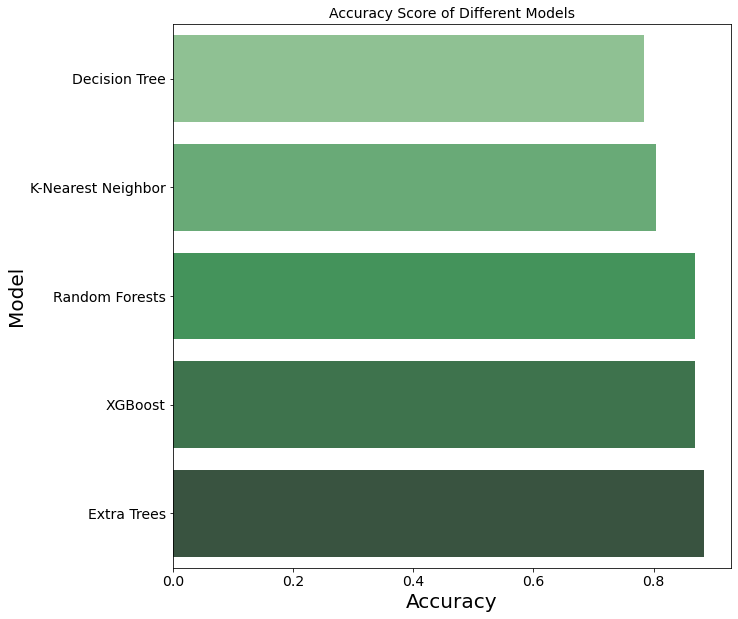

In [40]:
# create dataframe of accuracy and model and sort values
performance_comparison = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Decision Tree", "Random Forests", "Extra Trees", "XGBoost"],
                                       "Accuracy": [knn_accuracy, dt_accuracy, rf_accuracy, xrf_accuracy, xgb_accuracy]})

performance_comparison = performance_comparison.sort_values(by="Accuracy", ascending=True)

# set the plot
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=performance_comparison, palette="Greens_d")

# set title arrange labels
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)

**Extra Random Forest** outperformed other models with accuracy performance metrics. 

# 5. Hyperparameter Tuning

To recap, first I used default parameter settings to find which model yields best performance. I am going to search for the best set of parameters with random search and cross validation.

In random serach, set of ML model's parameters are defined in a range and inputted to *RandomizedSearchCV*. This model randomly selects some combination of the parameters and compares the defined accuracy with iterations. Random search runtime and iterations can be controlled with the parameter *n_iter*. This is in contrast to grid search iterations of every single combination of the given parameters. With intuition, one can say that, grid search requires more run-time than random search if a small number of n_iterations is defined. Generally, random search is better when there is a limited knowledge and of the best model hyperparameters and less time.

K-fold Cross validation is the method used to assess the performance of the hyperparameters on the whole dataset. Rather than splitting the dataset set into 2 static subsets of training and test, dataset is divided equally for the given K, and with iterations different K subsets are trained and tested. In other words, divide the dataset into K folds, and follow the iterative process where first traininig is done on K-1 of the folds and then evaluate performance on the Kth fold. Process is repeated K times, so eventually dataset is tested on every example keeping in mind that each iteration is testing on a subset that did not train on before. At the end of K-fold cross validation, average of the performance metric on each of the K iterations substitutes the final performance measure.

A visualization of cross-validation:

![A visualization of cross-validation:](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

### 5.1 Random Search

In [41]:
# The number of trees in the forest model, default value is 10.
n_estimators = [50, 100, 300, 500, 1000]

# The minimum number of samples required to split an internal node, default value is 2.
min_samples_split = [2, 3, 5, 7, 9]

# The minimum number of samples required to be at a leaf node, default value is 1.
min_samples_leaf = [1, 2, 4, 6, 8]

# The number of features to consider when looking for the best split, default value is auto.
max_features = ['auto', 'sqrt', 'log2', None] 

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

To find the best combination of the randomly set parameters and apply cross validation, I am going to use the RandomizedSearchCV with following arguments:

* *estimator*: the model
* *param_distributions*: the distribution of parameters we defined
* *cv*: K in the K-fold cross validation, number of subsets to create
* *n_iter*: the number of different combinations to try
* *scoring*: which metric to use when evaluating candidates
* *n_jobs*: number of cores to run in parallel (-1 will use all available)
* *verbose*: how much information to display (1 displays a limited amount)
* *return_train_score*: return the training score for each cross-validation fold
* *random_state*: fixes the random number generator used so we get the same results every run

In [42]:
# create model
best_model = ExtraTreesClassifier(random_state=42)

# create Randomized search object
random_cv = RandomizedSearchCV(estimator=best_model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=20, 
                               scoring = 'accuracy',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True, 
                               random_state=42)

In [43]:
# Fit on the all training data using random search object
random_cv.fit(X_train_scaled, y_train_adjusted)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=1)

In [44]:
random_cv.best_estimator_

ExtraTreesClassifier(max_features=None, n_estimators=300, random_state=42)

Here is the best combination of parameters:

* n_estimators = 300
* max_features = None

Let's apply those parameters to the extra random forests classifier model and see observe the improvement on the accuracy score.

In [46]:
xrf_classifier_w_random_search = ExtraTreesClassifier(n_estimators=300, 
                                                     max_features=None, 
                                                     random_state=42)

xrf_accuracy_opt_w_rand_search = model(xrf_classifier_w_random_search, X_train_scaled, y_train_adjusted, X_valid_scaled, y_valid_adjusted)

In [47]:
print("Accuracy score in the previous extra random forests model:", xrf_accuracy)
print("Accuracy score after hyperparameter tuning:", xrf_accuracy_opt_w_rand_search)

Accuracy score in the previous extra random forests model: 0.8845004978426817
Accuracy score after hyperparameter tuning: 0.8851642880849652


After the hypermeter parameter tuning I increased the accuracy of the model by 1 point.

### 5.2 Grid Search

Now, I am going to look if there is any room left for further improvement in accuracy score in the algorithm. I am going to look for that improvement in the n_estimator parameter. Having the possibility of long run-times in mind, I will use GridSearch with parameter n_estimators and pass a 6-element list as input, to keep the run-time at reasonable minutes.

Like random search, grid search also performs its search on whole data set with k-fold cross validation. I am going to use 5-fold cross validation as I did for random search.

In [49]:
# fit the dataset to grid search object
grid_search.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(max_features=None, random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [300, 500, 700, 900, 1200, 1500]},
             return_train_score=True, scoring='accuracy', verbose=1)

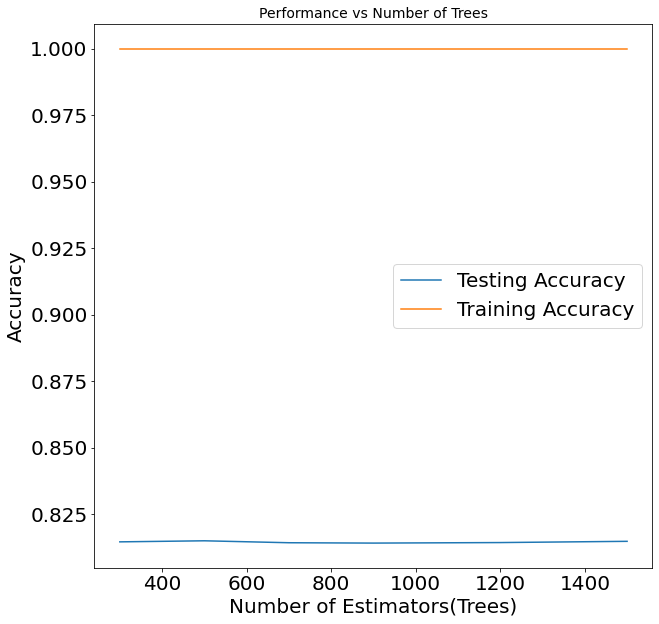

In [52]:
# Get the results into a dataframe
xrf_results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
plt.figure(figsize=(10,10))
plt.plot(xrf_results['param_n_estimators'], xrf_results['mean_test_score'], label = 'Testing Accuracy')
plt.plot(xrf_results['param_n_estimators'], xrf_results['mean_train_score'], label = 'Training Accuracy')

# set title, labels and legend
plt.xlabel('Number of Estimators(Trees)'); plt.ylabel('Accuracy'); plt.legend();
plt.title('Performance vs Number of Trees', size=14);

Training accuracy is very 100% percent, showing that the model studied and learned from the training set very well.

When it comes to testing accuracy, accuracy drops 20 points, resulting in accuracy level around 80%. This shows that the model is performing worse in a newly-introduced dataset. This picture also gives a clue about the submission score, I expect it to be around 80%.

Another important message is, There are slight changes in the accuracy for the test set which means number of estimators trees can be improved further. Let's see what is the best n_estimator value.

In [53]:
xrf_results[["param_n_estimators", "params", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

param_n_estimators                  params  mean_test_score
1                500   {'n_estimators': 500}         0.815115
5               1500  {'n_estimators': 1500}         0.814916
0                300   {'n_estimators': 300}         0.814716
4               1200  {'n_estimators': 1200}         0.814451
2                700   {'n_estimators': 700}         0.814384
3                900   {'n_estimators': 900}         0.814252

Model performed best when n_estimators are 500. So I am going to update model with that parameter.

In [56]:
xrf_optimal_model = ExtraTreesClassifier(n_estimators=500, 
                                           max_features=None, 
                                           random_state=42)

xrf_optimal_model_accuracy = model(xrf_optimal_model, X_train_scaled, y_train_adjusted, X_valid_scaled, y_valid_adjusted)

print("Accuracy score with random forests model when n_estimators=300:", xrf_accuracy_opt_w_rand_search)
print("Accuracy score with random forests model when n_estimators=500:", xrf_optimal_model_accuracy)

Accuracy score with random forests model when n_estimators=300: 0.8851642880849652
Accuracy score with random forests model when n_estimators=500: 0.886491868569532


### 5.3 Confusion Matrix

Reference: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823 for confusion matrix

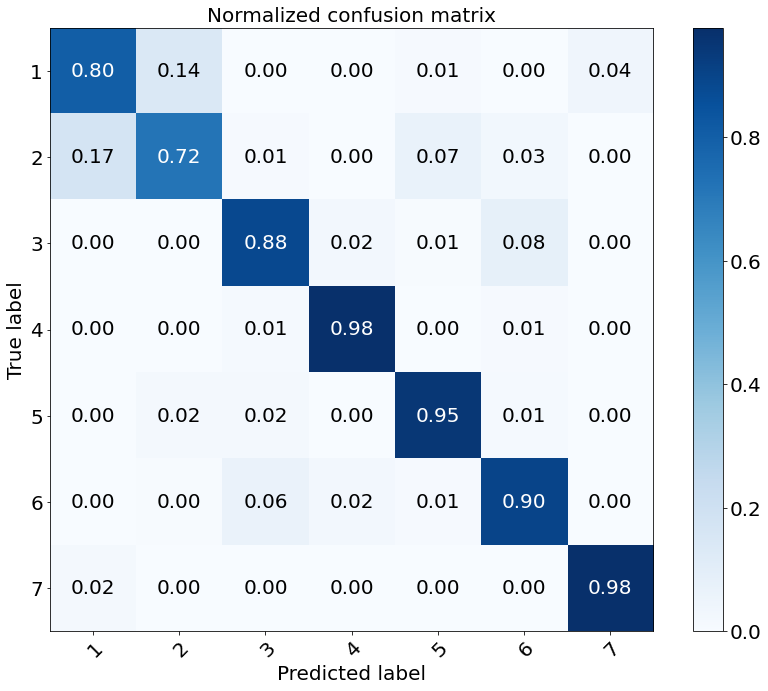

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = xrf_optimal_model.predict(X_valid_scaled)

# make a list of cover_types
cover_types = sorted(soil_numeric_df['Cover_Type'].value_counts().index.tolist())

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          figsize=(10, 8)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize = figsize)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


plot_confusion_matrix(y_valid_adjusted, y_pred, classes=cover_types, normalize=True,
                      title='Normalized confusion matrix', figsize = (12,10))
plt.tight_layout()
plt.show()

Model did pretty good detecting fantastic trees of type 3,4, 5, 6 and 7, and it seems a bit confused to detect types 1 and 2.

# 7. Summary

### 7.1 Where to find specific forest type?

* Spruce/Fir, Lodgepole Pine and Krummholz loves to hangout in Rawah, Neota and Comanche Peak Wilderness Area.
* Cache la Poudre Wilderness Area is perfect place for Ponderosa Pine and Cottonwood/Willow.
* If you see an Aspen suspect that you might be at the Rawah or Comanche.
* Douglas-fir is an easy going species, that goes along with any wilderness area.

### 7.2 How to find specific forest type?

To classify forest cover type, I implemented a extra random forest classifier model, fine tuned the model and generated predictions. I detected more than about 89% of the forest type correctly with selection of features, extra random forest model, and parameters.


In [67]:
#create list of features
features = list(X.columns)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': features, 
                                'importance': xrf_optimal_model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)
feature_results.head(10)

feature  importance
0                                   Elevation    0.200625
1                                   Soil_Type    0.149904
2  Mean_Elevation_Vertical_Distance_Hydrology    0.090099
3                            Wilderness_Area4    0.068338
4           Mean_Distance_Firepoints_Roadways    0.050331
5                                      Aspect    0.045443
6             Horizontal_Distance_To_Roadways    0.043770
7         sqrtEuclidian_Distance_To_Hydrology    0.042384
8          Horizontal_Distance_To_Fire_Points    0.040893
9        sqrtHorizontal_Distance_To_Hydrology    0.040826

Extra random forests showed that:
* elevation
* soil type
* mean distance of elevation and vertical distance hydrology
* wilderness_Area4
* mean distance of firepoints roadways

are the most important characteristics of a forest type. Top 5 features addressed the importance of feature engineering and selection.

# 8. Conclusion

We used multiple machine learning models to predict the forest cover types. We evaluated Random Forest, KNN, XGBoost, Extra Random Forest, and Decision Tree models. 

After testing each model, we found that **Extra Random Forest** model was the best performer with an accuracy of 0.8845. To improve model accuracy, I implemented random search and cross-validation, and the model was increased slightly to 0.8852. To find a room left for further improvement, I performed grid search and cross-validation, and the final model with parameters was increased slightly as well to **0.8865**.

As a result, our exploration of specific forest types revealed distinctive preferences across different wilderness areas, providing valuable insights for forest enthusiasts. Leveraging an extra random forest classifier with carefully selected features, we achieved a remarkable 89% accuracy in forest cover type classification, emphasizing the significance of feature engineering and highlighting key determinants such as elevation, soil type, and geographical features.

In [ ]:
# df_val = pd.read_csv('C:/Users/Upmanyu/Documents/GWU/machine learning 1/forest-cover-type-prediction/test.csv')
# df_val_1 = df_val.drop(['Id'],axis=1)

In [ ]:
# df_val.columns

In [ ]:
# X_val = scaler.transform(df_val_1)

In [ ]:
# df_val['Cover_Type'] = best_model.predict(X_val)

In [ ]:
# df_val[['Id','Cover_Type']].to_csv('submission.csv',index=False)